In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()
## there is no null value in this dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

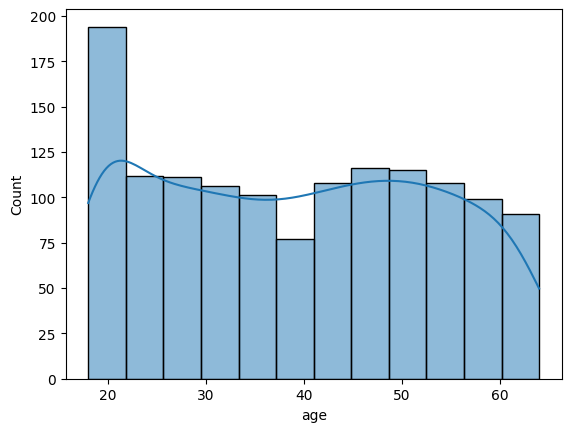

In [6]:
sns.histplot(df['age'],kde=True)

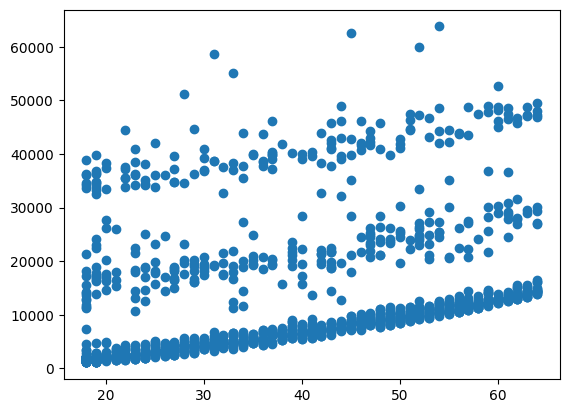

In [7]:
## age vs charge

plt.scatter(df['age'],df['charges'])

<Axes: xlabel='age', ylabel='charges'>

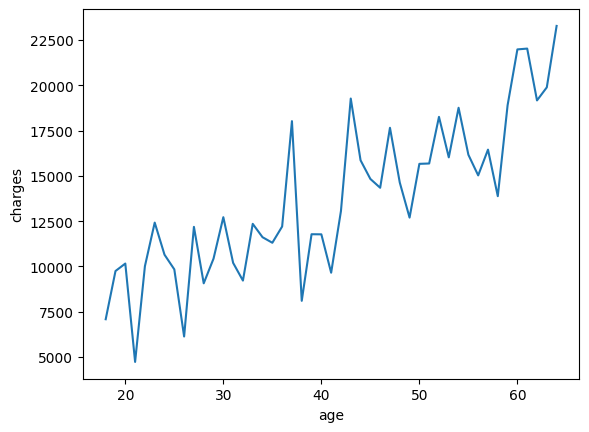

In [8]:
age_charge_avg=df.groupby('age')[['charges']].mean()
sns.lineplot(x='age',y='charges',data=age_charge_avg)

Conclusion: Charge increases as age increase

<Axes: xlabel='sex', ylabel='count'>

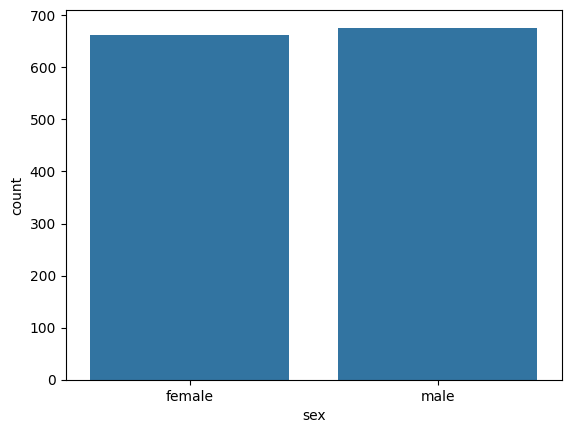

In [9]:
sns.countplot(x='sex',data=df)

<Axes: xlabel='sex', ylabel='charges'>

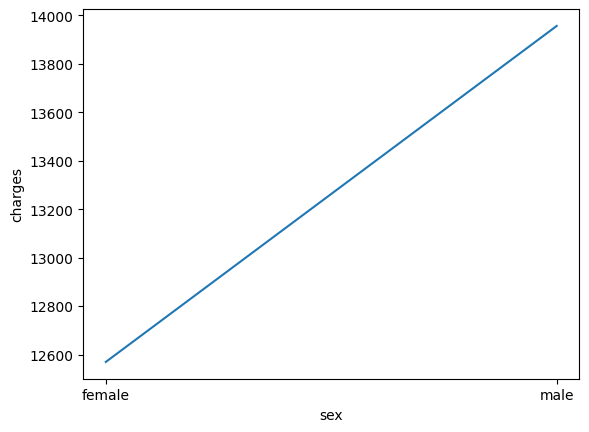

In [10]:
sex_charge_avg=df.groupby('sex')[['charges']].mean()
sns.lineplot(x='sex',y='charges',data=sex_charge_avg)

Conclusion: For male there is more charge

<Axes: xlabel='bmi', ylabel='Count'>

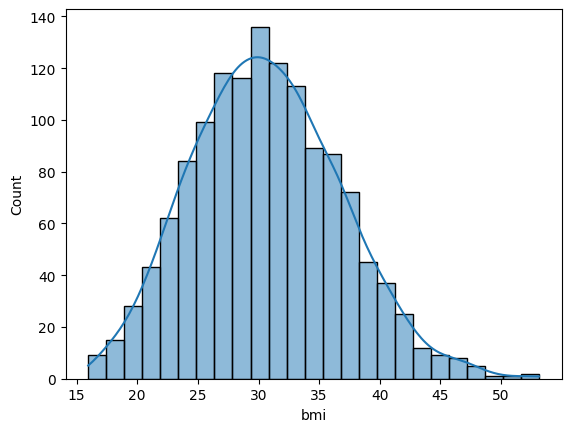

In [11]:
sns.histplot(df['bmi'],kde=True)

Normal BMI range: 18.5 to 25

conclusion: many people are overweight

<Axes: xlabel='children', ylabel='count'>

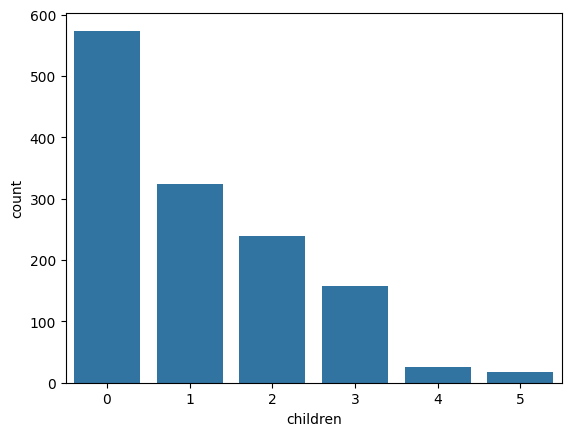

In [12]:

sns.countplot(x='children',data=df)


In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='charges'>

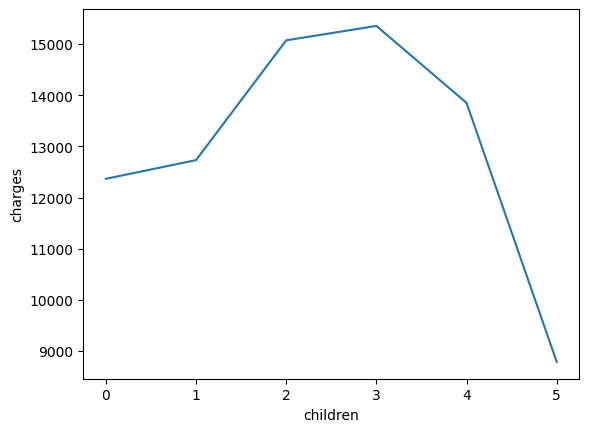

In [14]:
children_charge=df.groupby('children')[['charges']].mean()
sns.lineplot(x='children',y='charges',data=children_charge)

In [15]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

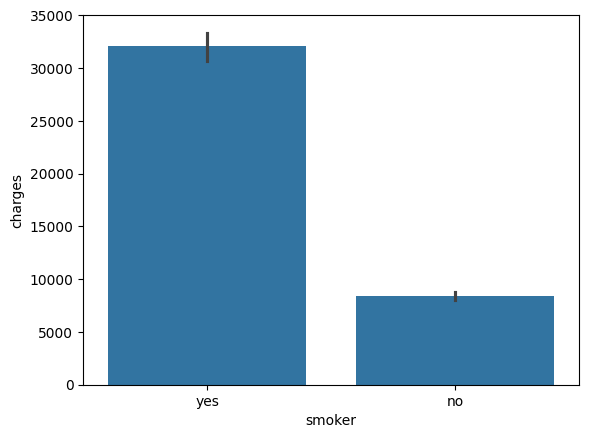

In [16]:
sns.barplot(x='smoker',y='charges',data=df,estimator=np.mean)

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

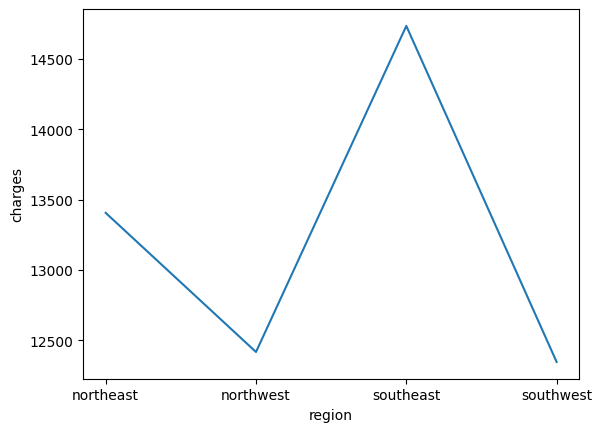

In [18]:
region_charge_avg=df.groupby('region')[['charges']].mean()
sns.lineplot(x='region',y='charges',data=region_charge_avg)

Conclusion: Southeast region has highest charges and northwest has lowest

In [19]:
## Since for male there is more charge we can use ordinal encoding
## male=1, female=0

df['sex']=df['sex'].map({'male':1,'female':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [21]:
## Same with smoker : yes=1 and no=0

df['smoker']=df['smoker'].map({'yes':1,'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [23]:
## for region we can use 1 hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(df[['region']]).toarray()



array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [24]:
## convert into dataframe
region=pd.DataFrame(encoder.fit_transform(df[['region']]).toarray(),columns=encoder.get_feature_names_out())
region

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [25]:
## merging dataframe
df.drop(['region'],axis=1,inplace=True)

df=pd.concat([df,region],axis=1)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [27]:
## Storing it in new file

df.to_csv("insurance_cleaned.csv",index=False)